#### This program shows how to find best threshhold value

The diabetes dataset is taken from [ Kaggle.com].

In [70]:
# reading data
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("heartdata.csv")
df.head()

#seperating target feature from data set
survived=df.target
inputs=df.drop('target',axis='columns')

#splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(inputs,survived,test_size=0.2)

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [84]:
#predicting roc-auc for tain and test data

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
#df2=pd.Series(model.predict_proba(X_test)[:,1])
y_predicted_train=model.predict_proba(X_train)
y_predicted_test=model.predict_proba(X_test)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_predicted_train[:,1])))
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_predicted_test[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.8868131868131868


In [73]:
#gives probability of a target feature 

y_predicted_test

array([[0.7       , 0.3       ],
       [0.26666667, 0.73333333],
       [0.43333333, 0.56666667],
       [0.33333333, 0.66666667],
       [0.1       , 0.9       ],
       [0.06666667, 0.93333333],
       [0.03333333, 0.96666667],
       [1.        , 0.        ],
       [0.76666667, 0.23333333],
       [0.83333333, 0.16666667],
       [0.03333333, 0.96666667],
       [0.93333333, 0.06666667],
       [0.83333333, 0.16666667],
       [0.3       , 0.7       ],
       [0.36666667, 0.63333333],
       [0.1       , 0.9       ],
       [0.33333333, 0.66666667],
       [0.83333333, 0.16666667],
       [0.16666667, 0.83333333],
       [0.93333333, 0.06666667],
       [0.46666667, 0.53333333],
       [0.83333333, 0.16666667],
       [0.9       , 0.1       ],
       [0.33333333, 0.66666667],
       [0.56666667, 0.43333333],
       [0.4       , 0.6       ],
       [0.96666667, 0.03333333],
       [0.33333333, 0.66666667],
       [0.86666667, 0.13333333],
       [0.03333333, 0.96666667],
       [0.

In [74]:
#gives probability of a target feature true prediction
pd.Series(y_predicted_test[:,1])

0     0.300000
1     0.733333
2     0.566667
3     0.666667
4     0.900000
        ...   
56    0.200000
57    0.133333
58    0.700000
59    0.533333
60    0.866667
Length: 61, dtype: float64

In [75]:
#### Calculate the False positive rate,True positive rate and threshlods

fpr, tpr, thresholds = roc_curve(y_test, pd.Series(y_predicted_test[:,1]))
thresholds

array([2.        , 1.        , 0.96666667, 0.93333333, 0.9       ,
       0.86666667, 0.83333333, 0.73333333, 0.7       , 0.66666667,
       0.63333333, 0.6       , 0.56666667, 0.53333333, 0.5       ,
       0.46666667, 0.43333333, 0.4       , 0.33333333, 0.3       ,
       0.2       , 0.16666667, 0.13333333, 0.1       , 0.03333333,
       0.        ])

In [76]:
import numpy as np
from sklearn.metrics import accuracy_score

#Gives highesht threhold value
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(df2>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

#concatenate threhold and accuracy
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']

#sorts theshold and accuracy in descending order
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
21,0.166667,0.639344
24,0.033333,0.622951
23,0.100000,0.622951
22,0.133333,0.622951
20,0.200000,0.622951


In [77]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    #plt.legend()
    plt.show()

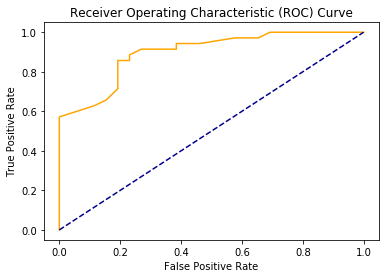

In [78]:
#plotting roc curve
plot_roc_curve(fpr,tpr)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[21,  5],
       [ 5, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

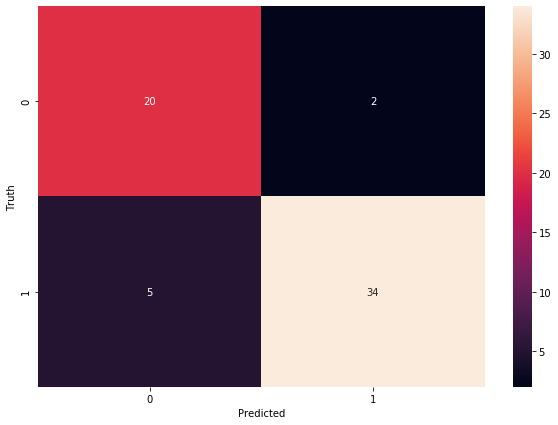

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')